# Projeto Final de Análise de Dados com Python - Avaliação de Conhecimentos


## Introdução ao Projeto:

Neste projeto final, vocês irão utilizar o banco de dados da NBA (Basketball) disponível no Kaggle para realizar uma análise completa, incluindo ETL (Extração, Transformação e Carregamento de dados), manipulação de banco de dados, consulta e cruzamento em SQL, análise estatística, e a construção de insights a partir dos dados.

O objetivo é aplicar o que foi aprendido ao longo do curso sobre manipulação de arquivos e bancos de dados, análise de dados com Python, além de desenvolver um pensamento crítico e analítico para a tomada de decisões com base nos dados.


Os dados do Kaggle estão neste link: [NBA](https://www.kaggle.com/datasets/wyattowalsh/basketball)


## Resumo dos Dados:


O banco de dados contém diversas tabelas relacionadas à NBA, permitindo realizar uma análise detalhada sobre jogadores, times, estatísticas de jogos e muito mais. Abaixo, uma visão geral das tabelas e suas colunas principais:

1. Tabela 'Players':

Player_ID: Identificação única de cada jogador.

Player_Name: Nome do jogador.

Team: Equipe em que o jogador atua.

Position: Posição em que o jogador joga.

Height: Altura do jogador.

Birth_Date: Data de nascimento do jogador.


2. Tabela 'Teams':

Team_ID: Identificação única de cada time.

Team_Name: Nome da equipe.

City: Cidade em que o time está localizado.

Arena: Nome da arena onde a equipe joga seus jogos em
casa.

3. Tabela 'Games':

Game_ID: Identificação única de cada jogo.

Home_Team_ID: ID do time da casa.

Away_Team_ID: ID do time visitante.

Date: Data do jogo.

Home_Score: Pontuação do time da casa.

Away_Score: Pontuação do time visitante.

4. Tabela 'Game_Stats':

Game_ID: Identificação do jogo.

Player_ID: ID do jogador que participou do jogo.

Points: Pontos marcados pelo jogador.

Rebounds: Rebotes realizados pelo jogador.

Assists: Assistências realizadas pelo jogador

## O você precisa fazer/entregar:

1. ETL - Construindo o Fluxo de Dados:

Manipulação de Banco de Dados: Conecte ao banco de dados SQLite sobre a NBA disponível no Kaggle. Verifique as tabelas existentes no banco e entenda a estrutura dos dados.

2. Consulta e Cruzamentos em SQL:

Utilize SQL para realizar cruzamentos entre as tabelas. Relacione as tabelas Players, Teams, e Game_Stats para descobrir o desempenho de jogadores em jogos específicos e suas respectivas equipes.

3. Extração para DataFrame Pandas:

Extraia os dados processados do SQL para um DataFrame em pandas e faça o tratamento necessário, como lidar com valores faltantes e formatação correta de colunas.

4. Limpeza e Tratamento:

Verifique os dados extraídos em busca de inconsistências, como valores ausentes, tipos de dados incorretos ou duplicatas. Realize o tratamento adequado para garantir uma análise precisa.

5. Análise Estatística e Visualizações:

- Manipulação dos Dados

Vamos explorar formas avançadas de manipular os dados usando apply, lambda, cut e groupby para extrair insights. Estas operações são fundamentais para um entendimento mais profundo das variáveis, bem como para a preparação de dados para análises estatísticas.

 1. Calcular a pontuação por jogador usando a função apply e uma função lambda:

 2. Agrupar os dados por time e calcular a média de pontuação, rebotes e assistências usando groupby:

 3. Classificar jogadores com base na pontuação usando cut e criar categorias de performance:


  - Estatísticas Descritivas

Após a manipulação inicial dos dados, os alunos devem calcular as principais estatísticas descritivas para variáveis de interesse, como pontuação, rebotes e assistências:

 1. Média, Mediana, Desvio Padrão e Quartis

- Probabilidade e Amostragem

Aqui, os alunos devem calcular a probabilidade de eventos específicos ocorrerem, como a probabilidade de um time ganhar ou um jogador alcançar uma pontuação acima de um determinado valor.

1. Probabilidade de um jogador marcar mais de 20 pontos;

2. Criar amostras de 30% dos dados para realizar análises estatísticas posteriores.

- Testes de Hipóteses

Agora, vocês devem realizar testes de hipóteses. Suponha que queremos testar se a média de pontos dos jogadores em casa é diferente da média de pontos dos jogadores em jogos fora de casa. Para isso, utilizaremos o Teste T.

6. Visualizações dos Dados

As visualizações são uma parte crucial da análise de dados, pois ajudam a apresentar os resultados de forma clara e compreensível.

1. Boxplot da Pontuação por Categoria de Jogador
2. Distribuição de Idade dos Jogadores com histograma
3. Gráfico de Barras mostrando a Relação entre Pontuação e Rebotes por Time

7. Conclusão da Análise

Construa uma conclusão que resuma os achados na análise.

## Preparando o Ambiente

In [1]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# direciona para o caminho desejado
%cd /content/drive/MyDrive/PRETALAB/Análise \de \Dados/Projeto \5

/content/drive/MyDrive/PRETALAB/Análise de Dados/Projeto 5


In [3]:
#Este módulo fornece uma maneira simples de usar funcionalidades que são dependentes de sistema operacional
import os

# os.getcwd() retorna o caminho absoluto do diretório de trabalho atual
print(os.getcwd())

/content/drive/MyDrive/PRETALAB/Análise de Dados/Projeto 5


In [4]:
# Mostra o conteudo do local/pasta
!ls

' Carolyne Santos de Oliveira - projeto5.ipynb'   nba.db


## Instalando as Bibliotecas

In [5]:
import kagglehub
import sqlite3
import os
import csv
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

#Liberar memória manualmente
import gc

In [6]:
#Instalar e Atualizar o kagglehub
!pip install --upgrade kagglehub

## 1. ETL - Construindo o Fluxo de Dados:
Manipulação de Banco de Dados: Conecte ao banco de dados SQLite sobre a NBA disponível no Kaggle. Verifique as tabelas existentes no banco e entenda a estrutura dos dados.

In [7]:
# Download do dataset "NBA Database" a partir do Kaggle
path = kagglehub.dataset_download("wyattowalsh/basketball/versions/231")

#  Mostrar o caminho do dataset
print("Path to dataset files:", path)

100%|██████████| 697M/697M [00:09<00:00, 74.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231


In [8]:
# Listar os arquivos do diretório
!ls /root/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231

csv  nba.sqlite


In [9]:
# Conecta ao banco de dados SQLite
conn = sqlite3.connect('/root/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/nba.sqlite')
cursor = conn.cursor()

In [10]:
# Conferir as tabelas no banco de dados 'nba.SQLite'
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tabelas = cursor.fetchall()
print(f'Tabelas disponíveis: {tabelas}')

Tabelas disponíveis: [('game',), ('game_summary',), ('other_stats',), ('officials',), ('inactive_players',), ('game_info',), ('line_score',), ('play_by_play',), ('player',), ('team',), ('common_player_info',), ('team_details',), ('team_history',), ('draft_combine_stats',), ('draft_history',), ('team_info_common',)]


In [11]:
# Consultar a estrutura das tabelas
cursor.execute("PRAGMA table_info('player')")
print(cursor.fetchall())

[(0, 'id', 'TEXT', 0, None, 0), (1, 'full_name', 'TEXT', 0, None, 0), (2, 'first_name', 'TEXT', 0, None, 0), (3, 'last_name', 'TEXT', 0, None, 0), (4, 'is_active', 'INTEGER', 0, None, 0)]


In [12]:
# Consultar a estrutura das tabelas
cursor.execute("PRAGMA table_info('common_player_info')")
print(cursor.fetchall())

[(0, 'person_id', 'TEXT', 0, None, 0), (1, 'first_name', 'TEXT', 0, None, 0), (2, 'last_name', 'TEXT', 0, None, 0), (3, 'display_first_last', 'TEXT', 0, None, 0), (4, 'display_last_comma_first', 'TEXT', 0, None, 0), (5, 'display_fi_last', 'TEXT', 0, None, 0), (6, 'player_slug', 'TEXT', 0, None, 0), (7, 'birthdate', 'TIMESTAMP', 0, None, 0), (8, 'school', 'TEXT', 0, None, 0), (9, 'country', 'TEXT', 0, None, 0), (10, 'last_affiliation', 'TEXT', 0, None, 0), (11, 'height', 'TEXT', 0, None, 0), (12, 'weight', 'TEXT', 0, None, 0), (13, 'season_exp', 'REAL', 0, None, 0), (14, 'jersey', 'TEXT', 0, None, 0), (15, 'position', 'TEXT', 0, None, 0), (16, 'rosterstatus', 'TEXT', 0, None, 0), (17, 'games_played_current_season_flag', 'TEXT', 0, None, 0), (18, 'team_id', 'INTEGER', 0, None, 0), (19, 'team_name', 'TEXT', 0, None, 0), (20, 'team_abbreviation', 'TEXT', 0, None, 0), (21, 'team_code', 'TEXT', 0, None, 0), (22, 'team_city', 'TEXT', 0, None, 0), (23, 'playercode', 'TEXT', 0, None, 0), (24, '

In [13]:
# Consultar a estrutura das tabelas
cursor.execute("PRAGMA table_info('team')")
print(cursor.fetchall())

[(0, 'id', 'TEXT', 0, None, 0), (1, 'full_name', 'TEXT', 0, None, 0), (2, 'abbreviation', 'TEXT', 0, None, 0), (3, 'nickname', 'TEXT', 0, None, 0), (4, 'city', 'TEXT', 0, None, 0), (5, 'state', 'TEXT', 0, None, 0), (6, 'year_founded', 'REAL', 0, None, 0)]


In [14]:
# Consultar a estrutura das tabelas
cursor.execute("PRAGMA table_info('team_details')")
print(cursor.fetchall())

[(0, 'team_id', 'TEXT', 0, None, 0), (1, 'abbreviation', 'TEXT', 0, None, 0), (2, 'nickname', 'TEXT', 0, None, 0), (3, 'yearfounded', 'REAL', 0, None, 0), (4, 'city', 'TEXT', 0, None, 0), (5, 'arena', 'TEXT', 0, None, 0), (6, 'arenacapacity', 'REAL', 0, None, 0), (7, 'owner', 'TEXT', 0, None, 0), (8, 'generalmanager', 'TEXT', 0, None, 0), (9, 'headcoach', 'TEXT', 0, None, 0), (10, 'dleagueaffiliation', 'TEXT', 0, None, 0), (11, 'facebook', 'TEXT', 0, None, 0), (12, 'instagram', 'TEXT', 0, None, 0), (13, 'twitter', 'TEXT', 0, None, 0)]


In [15]:
# Consultar a estrutura das tabelas
cursor.execute("PRAGMA table_info('game')")
print(cursor.fetchall())

[(0, 'season_id', 'TEXT', 0, None, 0), (1, 'team_id_home', 'TEXT', 0, None, 0), (2, 'team_abbreviation_home', 'TEXT', 0, None, 0), (3, 'team_name_home', 'TEXT', 0, None, 0), (4, 'game_id', 'TEXT', 0, None, 0), (5, 'game_date', 'TIMESTAMP', 0, None, 0), (6, 'matchup_home', 'TEXT', 0, None, 0), (7, 'wl_home', 'TEXT', 0, None, 0), (8, 'min', 'INTEGER', 0, None, 0), (9, 'fgm_home', 'REAL', 0, None, 0), (10, 'fga_home', 'REAL', 0, None, 0), (11, 'fg_pct_home', 'REAL', 0, None, 0), (12, 'fg3m_home', 'REAL', 0, None, 0), (13, 'fg3a_home', 'REAL', 0, None, 0), (14, 'fg3_pct_home', 'REAL', 0, None, 0), (15, 'ftm_home', 'REAL', 0, None, 0), (16, 'fta_home', 'REAL', 0, None, 0), (17, 'ft_pct_home', 'REAL', 0, None, 0), (18, 'oreb_home', 'REAL', 0, None, 0), (19, 'dreb_home', 'REAL', 0, None, 0), (20, 'reb_home', 'REAL', 0, None, 0), (21, 'ast_home', 'REAL', 0, None, 0), (22, 'stl_home', 'REAL', 0, None, 0), (23, 'blk_home', 'REAL', 0, None, 0), (24, 'tov_home', 'REAL', 0, None, 0), (25, 'pf_home'

In [16]:
# Consultar a estrutura das tabelas
cursor.execute("PRAGMA table_info('other_stats')")
print(cursor.fetchall())

[(0, 'game_id', 'TEXT', 0, None, 0), (1, 'league_id', 'TEXT', 0, None, 0), (2, 'team_id_home', 'TEXT', 0, None, 0), (3, 'team_abbreviation_home', 'TEXT', 0, None, 0), (4, 'team_city_home', 'TEXT', 0, None, 0), (5, 'pts_paint_home', 'INTEGER', 0, None, 0), (6, 'pts_2nd_chance_home', 'INTEGER', 0, None, 0), (7, 'pts_fb_home', 'INTEGER', 0, None, 0), (8, 'largest_lead_home', 'INTEGER', 0, None, 0), (9, 'lead_changes', 'INTEGER', 0, None, 0), (10, 'times_tied', 'INTEGER', 0, None, 0), (11, 'team_turnovers_home', 'INTEGER', 0, None, 0), (12, 'total_turnovers_home', 'INTEGER', 0, None, 0), (13, 'team_rebounds_home', 'INTEGER', 0, None, 0), (14, 'pts_off_to_home', 'INTEGER', 0, None, 0), (15, 'team_id_away', 'TEXT', 0, None, 0), (16, 'team_abbreviation_away', 'TEXT', 0, None, 0), (17, 'team_city_away', 'TEXT', 0, None, 0), (18, 'pts_paint_away', 'INTEGER', 0, None, 0), (19, 'pts_2nd_chance_away', 'INTEGER', 0, None, 0), (20, 'pts_fb_away', 'INTEGER', 0, None, 0), (21, 'largest_lead_away', 'IN

In [17]:
# Consultar a estrutura das tabelas
cursor.execute("PRAGMA table_info('line_score')")
print(cursor.fetchall())

[(0, 'game_date_est', 'TIMESTAMP', 0, None, 0), (1, 'game_sequence', 'INTEGER', 0, None, 0), (2, 'game_id', 'TEXT', 0, None, 0), (3, 'team_id_home', 'TEXT', 0, None, 0), (4, 'team_abbreviation_home', 'TEXT', 0, None, 0), (5, 'team_city_name_home', 'TEXT', 0, None, 0), (6, 'team_nickname_home', 'TEXT', 0, None, 0), (7, 'team_wins_losses_home', 'TEXT', 0, None, 0), (8, 'pts_qtr1_home', 'TEXT', 0, None, 0), (9, 'pts_qtr2_home', 'TEXT', 0, None, 0), (10, 'pts_qtr3_home', 'TEXT', 0, None, 0), (11, 'pts_qtr4_home', 'TEXT', 0, None, 0), (12, 'pts_ot1_home', 'INTEGER', 0, None, 0), (13, 'pts_ot2_home', 'INTEGER', 0, None, 0), (14, 'pts_ot3_home', 'INTEGER', 0, None, 0), (15, 'pts_ot4_home', 'INTEGER', 0, None, 0), (16, 'pts_ot5_home', 'INTEGER', 0, None, 0), (17, 'pts_ot6_home', 'INTEGER', 0, None, 0), (18, 'pts_ot7_home', 'INTEGER', 0, None, 0), (19, 'pts_ot8_home', 'INTEGER', 0, None, 0), (20, 'pts_ot9_home', 'INTEGER', 0, None, 0), (21, 'pts_ot10_home', 'INTEGER', 0, None, 0), (22, 'pts_hom

In [18]:
# Consultar a estrutura das tabelas
cursor.execute("PRAGMA table_info('play_by_play')")
print(cursor.fetchall())

[(0, 'game_id', 'TEXT', 0, None, 0), (1, 'eventnum', 'INTEGER', 0, None, 0), (2, 'eventmsgtype', 'INTEGER', 0, None, 0), (3, 'eventmsgactiontype', 'INTEGER', 0, None, 0), (4, 'period', 'INTEGER', 0, None, 0), (5, 'wctimestring', 'TEXT', 0, None, 0), (6, 'pctimestring', 'TEXT', 0, None, 0), (7, 'homedescription', 'TEXT', 0, None, 0), (8, 'neutraldescription', 'TEXT', 0, None, 0), (9, 'visitordescription', 'TEXT', 0, None, 0), (10, 'score', 'TEXT', 0, None, 0), (11, 'scoremargin', 'TEXT', 0, None, 0), (12, 'person1type', 'REAL', 0, None, 0), (13, 'player1_id', 'TEXT', 0, None, 0), (14, 'player1_name', 'TEXT', 0, None, 0), (15, 'player1_team_id', 'TEXT', 0, None, 0), (16, 'player1_team_city', 'TEXT', 0, None, 0), (17, 'player1_team_nickname', 'TEXT', 0, None, 0), (18, 'player1_team_abbreviation', 'TEXT', 0, None, 0), (19, 'person2type', 'REAL', 0, None, 0), (20, 'player2_id', 'TEXT', 0, None, 0), (21, 'player2_name', 'TEXT', 0, None, 0), (22, 'player2_team_id', 'TEXT', 0, None, 0), (23, '

In [19]:
# Commitar as mudanças e fechar a conexão com o banco de dados
conn.commit()
conn.close()

## 2. Consulta e Cruzamentos em SQL:
Utilize SQL para realizar cruzamentos entre as tabelas. Relacione as tabelas Players, Teams, e Game_Stats para descobrir o desempenho de jogadores em jogos específicos e suas respectivas equipes.

In [20]:
# Reabrir conexão com o banco de dados
conn = sqlite3.connect('/root/.cache/kagglehub/datasets/wyattowalsh/basketball/versions/231/nba.sqlite')
cursor = conn.cursor()

**Tabela 'Players**':
Player_ID: Identificação única de cada jogador.

Player_Name: Nome do jogador.

Team: Equipe em que o jogador atua.

Position: Posição em que o jogador joga.

Height: Altura do jogador.

Birth_Date: Data de nascimento do jogador.

In [21]:
# Criar a tabela 'players' no banco de dados com dados provenientes de 'player' e 'common_player_info'
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Players AS
    SELECT
        p.id AS player_id,
        cpi.first_name,
        p.last_name,
        p.full_name,
        cpi.team_id,
        cpi.team_city,
        cpi.team_name,
        cpi.team_abbreviation,
        cpi.position,
        cpi.height,
        cpi.birthdate,
        cpi.country,
        cpi.person_id
    FROM
        player p
    JOIN
        common_player_info cpi ON p.id = cpi.person_id
    WHERE
        p.id IS NOT NULL;
''')

In [22]:
# Consulta SQL para cruzar todas as tabelas de players
# query_player = '''
#    SELECT
#        p.id AS player_id,
#        cpi.first_name,
#        p.last_name,
#        p.full_name,
#        cpi.team_id,
#        cpi.team_city,
#        cpi.team_name,
#        cpi.team_abbreviation,
#        cpi.position,
#        cpi.height,
#        cpi.birthdate,
#        cpi.country,
#        cpi.person_id
#    FROM player p
#    JOIN common_player_info cpi ON p.id = cpi.person_id
#    WHERE p.id IS NOT NULL;
# '''

**Tabela 'Teams'**:
Team_ID: Identificação única de cada time.

Team_Name: Nome da equipe.

City: Cidade em que o time está localizado.

Arena: Nome da arena onde a equipe joga seus jogos em casa.

In [23]:
# Executar a consulta SQL para criar a tabela diretamente no banco de dados
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Teams AS
    SELECT
        td.team_id,
        t.full_name,
        td.abbreviation,
        td.nickname,
        td.city,
        t.state,
        td.arena
    FROM
        team t
    JOIN
        team_details td ON t.id = td.team_id
    WHERE
        t.id IS NOT NULL;
''')

In [24]:
# Consulta SQL para cruzar todas as tabelas de teams
# query_team = '''
#    SELECT
#    td.team_id,
#    t.full_name,
#    td.abbreviation,
#    td.nickname,
#    td.city,
#    t.state,
#   td.arena
#    FROM team t
#    JOIN team_details td ON t.id = td.team_id
#    WHERE t.id IS NOT NULL;
# '''

**Tabela 'Games'**:
Game_ID: Identificação única de cada jogo.

Home_Team_ID: ID do time da casa.

Away_Team_ID: ID do time visitante.

Date: Data do jogo.

Home_Score: Pontuação do time da casa.

Away_Score: Pontuação do time visitante.

In [25]:
# Executar a consulta SQL para criar a tabela diretamente no banco de dados
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Games AS
    SELECT
        game_id,
        team_id_home,
        team_name_home,
        pts_home,
        team_id_away,
        team_name_away,
        pts_away,
        game_date
    FROM
        game
    WHERE
        game_id IS NOT NULL;
''')

In [26]:
# Criando a tabela 'games' no banco de dados
# query_games = '''
#    SELECT
#    game_id,
#    team_id_home,
#    team_name_home,
#    pts_home,
#    team_id_away,
#    team_name_away,
#    pts_away,
#    game_date
#    FROM game
#    WHERE game_id IS NOT NULL;
# '''

**Tabela 'Game_Stats'**:
Game_ID: Identificação do jogo.

Player_ID: ID do jogador que participou do jogo.

Points: Pontos marcados pelo jogador.

Rebounds: Rebotes realizados pelo jogador.

Assists: Assistências realizadas pelo jogador

In [27]:
# Executar a consulta SQL para criar a tabela diretamente no banco de dados (Utilizei um limitador para buscar somente 1.000.000 registros!)
cursor.execute('''
  CREATE TABLE IF NOT EXISTS Game_Stats AS
    SELECT
        pbp.player1_id AS player_id,
        pbp.game_id,
        ls.pts_home AS points,
        os.team_rebounds_home AS rebounds,
        os.total_turnovers_home AS assists
    FROM
        play_by_play pbp
    JOIN
        line_score ls ON pbp.game_id = ls.game_id
    JOIN
        other_stats os ON pbp.game_id = os.game_id
    WHERE
        pbp.game_id IS NOT NULL;
 ''')

In [28]:
# Consulta SQL para cruzar todas as tabelas de games_stats
#query_game_stat = '''
#    SELECT
#    pbp.game_id,
#    pbp.player1_id AS player_id,
#    ls.pts_home AS points,
#    os.team_rebounds_home AS rebounds,
#    g.ast_home AS assists
#    FROM line_score ls
#    JOIN play_by_play pbp ON ls.game_id = pbp.game_id
#    JOIN other_stats os ON ls.team_id_home = os.team_id_home
#    JOIN game g ON ls.game_id = g.game_id
#    WHERE g.game_id IS NOT NULL;
#    '''

**Cruzamento entre tabelas**

Relacione as tabelas Players, Teams, e Game_Stats para descobrir o desempenho de jogadores em jogos específicos e suas respectivas equipes.

In [29]:
# Consulta SQL para relacionar Players, Teams e Game_Stats
query_desempenho = '''
SELECT
    p.player_id,
    p.full_name AS player_name,
    p.birthdate,
    t.team_id,
    t.full_name AS team_name,
    t.abbreviation,
    t.city AS team_city,
    gs.game_id,
    gs.points,
    gs.rebounds,
    gs.assists
FROM
    Players p
JOIN
    Teams t ON p.team_id = t.team_id
JOIN
    Game_Stats gs ON p.player_id = gs.player_id
ORDER BY
    p.player_id;
'''

## 3. Extração para DataFrame Pandas:
Extraia os dados processados do SQL para um DataFrame em pandas e faça o tratamento necessário, como lidar com valores faltantes e formatação correta de colunas.

- **Games**

In [30]:
# Executar a consulta e armazenar os resultados em um DataFrame
query_games = "SELECT * FROM games"
Games = pd.read_sql_query(query_games, conn)

In [31]:
# Visualizar todas as colunas
Games.columns

Index(['game_id', 'team_id_home', 'team_name_home', 'pts_home', 'team_id_away',
       'team_name_away', 'pts_away', 'game_date'],
      dtype='object')

- **Players**

In [32]:
# Executar a consulta e armazenar os resultados em um DataFrame
query_player = "SELECT * FROM players"
Players = pd.read_sql_query(query_player, conn)

In [33]:
# Visualizar todas as colunas
Players.columns

Index(['player_id', 'first_name', 'last_name', 'full_name', 'team_id',
       'team_city', 'team_name', 'team_abbreviation', 'position', 'height',
       'birthdate', 'country', 'person_id'],
      dtype='object')

- **Teams**

In [34]:
# Executar a consulta e armazenar os resultados em um DataFrame
query_team = "SELECT * FROM teams"
Teams = pd.read_sql_query(query_team, conn)

In [35]:
# Visualizar todas as colunas
colunas = Teams.columns
print(colunas)

Index(['team_id', 'full_name', 'abbreviation', 'nickname', 'city', 'state',
       'arena'],
      dtype='object')


- **Game_Stats**

In [36]:
# Consultar a tabela diretamente e carregar no DataFrame
query_game_stat = "SELECT * FROM game_stats"
Game_Stats = pd.read_sql_query(query_game_stat, conn)

In [37]:
# Visualizar todas as colunas
colunas = Game_Stats.columns
print(colunas)

Index(['player_id', 'game_id', 'points', 'rebounds', 'assists'], dtype='object')


- **Desempenho Jogadores**

In [38]:
# Executar a consulta e armazenar os resultados em um DataFrame
desempenho_players = pd.read_sql_query(query_desempenho, conn)

In [39]:
# Visualizar todas as colunas
colunas = desempenho_players.columns
print(colunas)

Index(['player_id', 'player_name', 'birthdate', 'team_id', 'team_name',
       'abbreviation', 'team_city', 'game_id', 'points', 'rebounds',
       'assists'],
      dtype='object')


Fechando Banco de Dados

In [40]:
# Commitar as mudanças e fechar a conexão com o banco de dados SQLite
conn.commit()
conn.close()

**Tratando os dados:** valores faltantes e formatação correta de colunas

In [41]:
# Visualizar df
Games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65698 entries, 0 to 65697
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         65698 non-null  object 
 1   team_id_home    65698 non-null  object 
 2   team_name_home  65698 non-null  object 
 3   pts_home        65698 non-null  float64
 4   team_id_away    65698 non-null  object 
 5   team_name_away  65698 non-null  object 
 6   pts_away        65698 non-null  float64
 7   game_date       65698 non-null  object 
dtypes: float64(2), object(6)
memory usage: 4.0+ MB


In [42]:
# Transformas as colunas 'game_date' e 'season' em data
Games['game_date'] = pd.to_datetime(Games['game_date'])

In [43]:
# Visualizar df
Games.head()

,game_id,team_id_home,team_name_home,pts_home,team_id_away,team_name_away,pts_away,game_date
0,0024600001,1610610035,Toronto Huskies,66.0,1610612752,New York Knicks,68.0,1946-11-01
1,0024600003,1610610034,St. Louis Bombers,56.0,1610610031,Pittsburgh Ironmen,51.0,1946-11-02
2,0024600002,1610610032,Providence Steamrollers,59.0,1610612738,Boston Celtics,53.0,1946-11-02
3,0024600004,1610610025,Chicago Stags,63.0,1610612752,New York Knicks,47.0,1946-11-02
4,0024600005,1610610028,Detroit Falcons,33.0,1610610036,Washington Capitols,50.0,1946-11-02


In [44]:
# Visualizar df
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632 entries, 0 to 3631
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   player_id          3632 non-null   object
 1   first_name         3632 non-null   object
 2   last_name          3632 non-null   object
 3   full_name          3632 non-null   object
 4   team_id            3632 non-null   int64 
 5   team_city          3632 non-null   object
 6   team_name          3632 non-null   object
 7   team_abbreviation  3632 non-null   object
 8   position           3632 non-null   object
 9   height             3632 non-null   object
 10  birthdate          3632 non-null   object
 11  country            3631 non-null   object
 12  person_id          3632 non-null   object
dtypes: int64(1), object(12)
memory usage: 369.0+ KB


In [49]:
# Visualizar df
Players.head()

,player_id,first_name,last_name,full_name,team_id,team_city,team_name,team_abbreviation,position,height,birthdate,country,person_id
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,1610612757,Portland,Trail Blazers,POR,Forward,6-10,1968-06-24 00:00:00,USA,76001
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,1610612745,Houston,Rockets,HOU,Center,6-9,1946-04-07 00:00:00,USA,76002
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,1610612747,Los Angeles,Lakers,LAL,Center,7-2,1947-04-16 00:00:00,USA,76003
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,1610612763,Vancouver,Grizzlies,VAN,Forward,6-9,1976-12-11 00:00:00,USA,949
4,76006,Forest,Able,Forest Able,1610612755,Syracuse,Nationals,PHI,Guard,6-3,1932-07-27 00:00:00,USA,76006


In [50]:
# Visualizar df
Teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   team_id       27 non-null     object
 1   full_name     27 non-null     object
 2   abbreviation  27 non-null     object
 3   nickname      27 non-null     object
 4   city          27 non-null     object
 5   state         27 non-null     object
 6   arena         27 non-null     object
dtypes: object(7)
memory usage: 1.6+ KB


In [51]:
# Visualizar df
Teams.head()

,team_id,full_name,abbreviation,nickname,city,state,arena
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,State Farm Arena
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,TD Garden
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,Rocket Mortgage FieldHouse
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,Smoothie King Center
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,United Center


In [52]:
# Visualizar df
Game_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11434871 entries, 0 to 11434870
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   player_id  object 
 1   game_id    object 
 2   points     float64
 3   rebounds   float64
 4   assists    float64
dtypes: float64(3), object(2)
memory usage: 436.2+ MB


In [53]:
# Visualizar df
Game_Stats.head()

,player_id,game_id,points,rebounds,assists
0,0,0029600012,96.0,11.0,12.0
1,406,0029600012,96.0,11.0,12.0
2,208,0029600012,96.0,11.0,12.0
3,406,0029600012,96.0,11.0,12.0
4,76,0029600012,96.0,11.0,12.0


In [54]:
Game_Stats.describe()

,points,rebounds,assists
count,1.143487e+07,1.063948e+07,1.130943e+07
mean,1.017750e+02,8.519190e+00,1.458212e+01
std,1.406282e+01,3.148388e+00,4.047424e+00
min,5.300000e+01,0.000000e+00,2.000000e+00
25%,9.200000e+01,6.000000e+00,1.200000e+01
50%,1.010000e+02,8.000000e+00,1.400000e+01
75%,1.110000e+02,1.000000e+01,1.700000e+01
max,1.960000e+02,2.700000e+01,3.400000e+01


In [55]:
# Verificar valores nulos
Game_Stats.isnull().sum()

,0
player_id,0
game_id,0
points,0
rebounds,795392
assists,125437


In [56]:
# Excluir valores nulos do df 'Game_Stats'
Game_Stats = Game_Stats.dropna(subset=['rebounds', 'assists'])

In [57]:
# Verificar valores nulos
Game_Stats.isnull().sum()

,0
player_id,0
game_id,0
points,0
rebounds,0
assists,0


In [58]:
# Substituir datatype das colunas numericas de float para int
Game_Stats['points'] = Game_Stats['points'].astype(int)
Game_Stats['rebounds'] = Game_Stats['rebounds'].astype(int)
Game_Stats['assists'] = Game_Stats['assists'].astype(int)

In [59]:
# Visualizar df
desempenho_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754670 entries, 0 to 5754669
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   player_id     object 
 1   player_name   object 
 2   birthdate     object 
 3   team_id       object 
 4   team_name     object 
 5   abbreviation  object 
 6   team_city     object 
 7   game_id       object 
 8   points        float64
 9   rebounds      float64
 10  assists       float64
dtypes: float64(3), object(8)
memory usage: 483.0+ MB


In [60]:
# Verificar valores nulos na tabela 'desempenho_players'
desempenho_players.isnull().sum()

,0
player_id,0
player_name,0
birthdate,0
team_id,0
team_name,0
abbreviation,0
team_city,0
game_id,0
points,0
rebounds,387236


In [61]:
# Excluir valores nulos do df 'desempenho_players'
desempenho_players = desempenho_players.dropna(subset=['rebounds', 'assists'])

In [62]:
# Substituir datatype das colunas numericas de float para int
desempenho_players['points'] = desempenho_players['points'].astype(int)
desempenho_players['rebounds'] = desempenho_players['rebounds'].astype(int)
desempenho_players['assists'] = desempenho_players['assists'].astype(int)

In [63]:
# Verificar valores nulos após a exclusão na tabela 'desempenho_players'
desempenho_players.isnull().sum()

,0
player_id,0
player_name,0
birthdate,0
team_id,0
team_name,0
abbreviation,0
team_city,0
game_id,0
points,0
rebounds,0


**- Criando um novo banco para inserir as novas tabelas!**

In [64]:
 #Criar um novo banco de dados chamado 'nba.db'
banco_nba = sqlite3.connect('nba.db')

# Criar um cursor para executar comandos SQL
cursor = banco_nba.cursor()

print("Conectado ao banco de dados 'banco_nba'.")

Conectado ao banco de dados 'banco_nba'.


In [65]:
# Inserir DataFrame no banco de dados como uma tabela
Games.to_sql('Games', banco_nba, if_exists='replace', index=False)

print("Tabela 'Games' criada e dados inseridos com sucesso.")

Tabela 'Games' criada e dados inseridos com sucesso.


In [66]:
# Inserir DataFrame no banco de dados como uma tabela
Teams.to_sql('Teams', banco_nba, if_exists='replace', index=False)

print("Tabela 'Teams' criada e dados inseridos com sucesso.")

Tabela 'Teams' criada e dados inseridos com sucesso.


In [67]:
# Inserir DataFrame no banco de dados como uma tabela
Players.to_sql('Players', banco_nba, if_exists='replace', index=False)

print("Tabela 'Players' criada e dados inseridos com sucesso.")

Tabela 'Players' criada e dados inseridos com sucesso.


In [68]:
# Inserir DataFrame no banco de dados como uma tabela
Game_Stats.to_sql('Game_Stats', banco_nba, if_exists='replace', index=False)

print("Tabela 'Game_Stats' criada e dados inseridos com sucesso.")

Tabela 'Game_Stats' criada e dados inseridos com sucesso.


In [69]:
# Inserir DataFrame no banco de dados como uma tabela
desempenho_players.to_sql('desempenho_players', banco_nba, if_exists='replace', index=False)

print("Tabela 'desempenho_players' criada e dados inseridos com sucesso.")

Tabela 'desempenho_players' criada e dados inseridos com sucesso.


In [70]:
# Exclui o objeto e força a coleta de lixo (para liberar espaço)
del Players
del Teams
del Games
del Game_Stats
gc.collect()

0

In [71]:
# Commitar as mudanças e fechar a conexão com o banco de dados
banco_nba.commit()
banco_nba.close()

## 4.Limpeza e Tratamento:
Verifique os dados extraídos em busca de inconsistências, como valores ausentes, tipos de dados incorretos ou duplicatas. Realize o tratamento adequado para garantir uma análise precisa.

In [72]:
# Informações da tabela 'desempenho_players'
desempenho_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5367434 entries, 0 to 5754648
Data columns (total 11 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   player_id     object
 1   player_name   object
 2   birthdate     object
 3   team_id       object
 4   team_name     object
 5   abbreviation  object
 6   team_city     object
 7   game_id       object
 8   points        int64 
 9   rebounds      int64 
 10  assists       int64 
dtypes: int64(3), object(8)
memory usage: 491.4+ MB


In [73]:
# Análise Descritiva das colunas do df 'desempenho_players'
desempenho_players.describe()

,points,rebounds,assists
count,5.367434e+06,5.367434e+06,5.367434e+06
mean,1.028801e+02,8.465590e+00,1.454149e+01
std,1.423872e+01,3.139153e+00,4.046962e+00
min,5.300000e+01,0.000000e+00,2.000000e+00
25%,9.300000e+01,6.000000e+00,1.200000e+01
50%,1.020000e+02,8.000000e+00,1.400000e+01
75%,1.120000e+02,1.000000e+01,1.700000e+01
max,1.960000e+02,2.700000e+01,3.400000e+01


Dados dentro do padrão, média bem proxima a mediana. E o desvio padrão baixo.

In [74]:
# Verificar valores ausentes
desempenho_players.isnull().sum()

,0
player_id,0
player_name,0
birthdate,0
team_id,0
team_name,0
abbreviation,0
team_city,0
game_id,0
points,0
rebounds,0


In [75]:
# Dados duplicados
desempenho_players.duplicated().sum()

5105655

In [76]:
# Verificar dados duplicados na coluna player_id
desempenho_players.duplicated(subset='player_id').sum()

5366214

Os dados duplicados existem pois há mais de um jogador por jogo. Não vou excluí-los.

In [77]:
# Visualizar df
desempenho_players.head()

,player_id,player_name,birthdate,team_id,team_name,abbreviation,team_city,game_id,points,rebounds,assists
0,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18
1,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18
2,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18
3,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18
4,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18


In [78]:
# Info sobre o df
desempenho_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5367434 entries, 0 to 5754648
Data columns (total 11 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   player_id     object
 1   player_name   object
 2   birthdate     object
 3   team_id       object
 4   team_name     object
 5   abbreviation  object
 6   team_city     object
 7   game_id       object
 8   points        int64 
 9   rebounds      int64 
 10  assists       int64 
dtypes: int64(3), object(8)
memory usage: 491.4+ MB


## 5. Análise Estatística e Visualizações:

- **Manipulação dos Dados**

Vamos explorar formas avançadas de manipular os dados usando apply, lambda, cut e groupby para extrair insights. Estas operações são fundamentais para um entendimento mais profundo das variáveis, bem como para a preparação de dados para análises estatísticas.

*Calcular a pontuação por jogador usando a função apply e uma função lambda:*

In [79]:
# Calcular a pontuação por jogador usando a função apply
desempenho_players['score'] = desempenho_players.apply(lambda row: row['points'] + row['rebounds'] + row['assists'], axis=1)

In [80]:
# Verificar alteração no df
desempenho_players.head()

,player_id,player_name,birthdate,team_id,team_name,abbreviation,team_city,game_id,points,rebounds,assists,score
0,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18,128
1,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18,128
2,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18,128
3,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18,128
4,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18,128


In [81]:
# Verificar valores na coluna 'score'
desempenho_players['score'].unique()

array([128, 138, 117, 109, 132, 107, 101, 116, 108, 110, 120, 135, 127,
       118, 123, 119, 131, 139, 125, 111, 102, 121, 114, 129, 112, 104,
       159, 152, 133, 122, 105, 103, 100,  90, 126, 113, 124, 156,  99,
       145, 136, 115, 137, 130,  96, 154, 106, 134,  93, 143, 140,  94,
       141,  86, 148, 142, 155,  92, 147,  97, 144, 146, 168, 149,  95,
        80, 150,  88, 163, 153,  98,  91, 181,  89, 164, 151, 158,  85,
       157, 166, 172, 176,  87, 162, 169, 174,  82, 161, 160, 173, 178,
       167, 184, 170, 171, 182, 175, 179,  73,  84,  77,  83,  81,  75,
       165, 194, 183, 188, 192, 180, 177, 186,  79, 230, 213])

In [82]:
# modificar o tipo de dados da coluna 'score'
desempenho_players['score'] = desempenho_players['score'].astype(int)

In [83]:
# Verificar alteração no df, ou seja, o score por jogador
desempenho_players[['player_name', 'score']].drop_duplicates()

,player_name,score
0,Shandon Anderson,128
9,Shandon Anderson,138
44,Shandon Anderson,117
74,Shandon Anderson,109
85,Shandon Anderson,132
...,...,...
5754519,Mark Pope,100
5754538,Mark Pope,103
5754551,Mark Pope,141
5754601,Mark Pope,142


*Agrupar os dados por time e calcular a média de pontuação, rebotes e assistências usando groupby:*

In [84]:
# Média de pontuação, rebotes e assistências por time, com groupby
media_time = desempenho_players.groupby('team_id')[['points', 'rebounds', 'assists']].mean()

# Verificar médias calculadas
print(f'A Média de pontos por time é:\n{media_time}')

A Média de pontos por time é:
                points  rebounds    assists
team_id                                    
1610612737  105.007652  8.305133  14.408002
1610612738  101.797704  8.477115  14.719975
1610612739  102.613306  8.454196  14.680050
1610612740  102.138683  8.308172  14.315186
1610612741  101.346819  8.462382  14.549240
1610612742  102.961239  8.135756  14.191869
1610612743  102.160284  8.630273  14.577367
1610612744  106.496134  8.194262  14.976307
1610612745  101.297897  8.558456  14.509083
1610612746  103.186803  8.497856  14.560289
1610612747  102.910997  8.775909  14.439196
1610612748  100.678699  8.448858  14.409026
1610612749  104.973400  8.343411  14.274021
1610612750  101.725401  8.712558  14.578679
1610612751  102.815864  8.255940  14.188594
1610612752  102.407657  8.585106  14.561865
1610612753  103.381950  8.524988  14.668427
1610612754  101.431959  8.408236  14.616398
1610612755  103.754974  8.622126  14.902820
1610612756  105.986636  8.345250  14.548629
16

*Classificar jogadores com base na pontuação usando cut e criar categorias de performance:*

In [85]:
# Verificar coluna score
desempenho_players['score'].unique()

array([128, 138, 117, 109, 132, 107, 101, 116, 108, 110, 120, 135, 127,
       118, 123, 119, 131, 139, 125, 111, 102, 121, 114, 129, 112, 104,
       159, 152, 133, 122, 105, 103, 100,  90, 126, 113, 124, 156,  99,
       145, 136, 115, 137, 130,  96, 154, 106, 134,  93, 143, 140,  94,
       141,  86, 148, 142, 155,  92, 147,  97, 144, 146, 168, 149,  95,
        80, 150,  88, 163, 153,  98,  91, 181,  89, 164, 151, 158,  85,
       157, 166, 172, 176,  87, 162, 169, 174,  82, 161, 160, 173, 178,
       167, 184, 170, 171, 182, 175, 179,  73,  84,  77,  83,  81,  75,
       165, 194, 183, 188, 192, 180, 177, 186,  79, 230, 213])

In [86]:
# Calculo do quartil da coluna 'score'
quartil = desempenho_players['score'].quantile([0.25, 0.5, 0.75])
print(quartil)

0.25    116.0
0.50    125.0
0.75    135.0
Name: score, dtype: float64


In [87]:
# Score Mínimo
min = desempenho_players['score'].min()
med = desempenho_players['score'].median()
max = desempenho_players['score'].max()
print(f'O score mínimo é: {min}')
print(f'O score mediano é: {med}')
print(f'O score máximo é: {max}')

O score mínimo é: 73
O score mediano é: 125.0
O score máximo é: 230


Utilizei os valores mínimos, médios e máximo da coluna 'score' para o bins.
Parâmetro 'bins': Define as faixas de pontuação para cada categoria. Neste caso, os intervalos são:

60 a 110: Classificados como "Baixo Desempenho."
110 a 129: Classificados como "Médio Desempenho."
129 a 190: Classificados como "Alto Desempenho."

In [88]:
# Classificação dos Jogadores com base na pontuação
desempenho_players['performance'] = pd.cut(
    desempenho_players['score'],
    bins=[70, 116, 135, 230],
    labels=['Baixo Desempenho', 'Medio Desempenho', 'Alto Desempenho'],
    right=False
)

# Verifica df com nova coluna
desempenho_players.head()

,player_id,player_name,birthdate,team_id,team_name,abbreviation,team_city,game_id,points,rebounds,assists,score,performance
0,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18,128,Medio Desempenho
1,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18,128,Medio Desempenho
2,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18,128,Medio Desempenho
3,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18,128,Medio Desempenho
4,1000,Shandon Anderson,1973-12-31,1610612752,New York Knicks,NYK,New York,0020000008,98,12,18,128,Medio Desempenho


- **Estatísticas Descritivas**

Após a manipulação inicial dos dados, os alunos devem calcular as principais estatísticas descritivas para variáveis de interesse, como pontuação, rebotes e assistências.

*Média, Mediana, Desvio Padrão e Quartis.*

In [91]:
# Calcular o mínimo das variáveis 'rebounds', 'assists' 'score' e 'points'
minimo_rebounds = desempenho_players['rebounds'].min()
minimo_assists = desempenho_players['assists'].min()
minimo_score = desempenho_players['score'].min()
minimo_points = desempenho_players['points'].min()

print(f'O Mínimo de rebotes por jogador é de: {minimo_rebounds:.1f}\n')
print(f'O Mínimo de assistências por jogador é de: {minimo_assists:.2f}\n')
print(f'O Mínimo da pontuação total (score) por jogador é de: {minimo_score:.2f}\n')
print(f'O Mínimo de pontos por jogador é de: {minimo_points:.2f}')

O Mínimo de rebotes por jogador é de: 0.0

O Mínimo de assistências por jogador é de: 2.00

O Mínimo da pontuação total (score) por jogador é de: 73.00

O Mínimo de pontos por jogador é de: 53.00


In [92]:
# Calcular o máximo das variáveis 'rebounds', 'assists' 'score' e 'points'
max_rebounds = desempenho_players['rebounds'].max()
max_assists = desempenho_players['assists'].max()
max_score = desempenho_players['score'].max()
max_points = desempenho_players['points'].max()

print(f'O Máximo de rebotes por jogador é de: {max_rebounds:.2f}\n')
print(f'O Máximo de assistências por jogador é de: {max_assists:.2f}\n')
print(f'O Máximo da pontuação total (score) por jogador é de: {max_score:.2f}\n')
print(f'O Máximo de pontos por jogador é de: {max_points:.2f}')

O Máximo de rebotes por jogador é de: 27.00

O Máximo de assistências por jogador é de: 34.00

O Máximo da pontuação total (score) por jogador é de: 230.00

O Máximo de pontos por jogador é de: 196.00


In [93]:
# Calcular a Média das variáveis 'rebounds', 'assists' 'score' e 'points'
media_rebounds = desempenho_players['rebounds'].mean()
media_assists = desempenho_players['assists'].mean()
media_score = desempenho_players['score'].mean()
media_points = desempenho_players['points'].mean()

print(f'A Média de rebotes por jogador é de: {media_rebounds:.2f}\n')
print(f'A Média de assistências por jogador é de: {media_assists:.2f}\n')
print(f'A Média da pontuação total (score) por jogador é de: {media_score:.2f}\n')
print(f'A Média de pontos por jogador é de: {media_points:.2f}')

A Média de rebotes por jogador é de: 8.47

A Média de assistências por jogador é de: 14.54

A Média da pontuação total (score) por jogador é de: 125.89

A Média de pontos por jogador é de: 102.88


In [94]:
# Calcular a Mediana das variáveis 'rebounds', 'assists' e 'score'
mediana_rebounds = desempenho_players['rebounds'].median()
mediana_assists = desempenho_players['assists'].median()
mediana_score = desempenho_players['score'].median()
mediana_points = desempenho_players['points'].median()

print(f'A Mediana de rebotes é de: {mediana_rebounds}\n')
print(f'A Mediana de assistências é de: {mediana_assists}\n')
print(f'A Mediana da pontuação total (score) é de: {mediana_score}\n')
print(f'A Mediana de pontos é de: {mediana_points}')

A Mediana de rebotes é de: 8.0

A Mediana de assistências é de: 14.0

A Mediana da pontuação total (score) é de: 125.0

A Mediana de pontos é de: 102.0


In [95]:
# Calcular o Desvio Padrão das variáveis 'rebounds', 'assists' e 'score'
desvio_padrao_rebounds = desempenho_players['rebounds'].std()
desvio_padrao_assists = desempenho_players['assists'].std()
desvio_padrao_score = desempenho_players['score'].std()
desvio_padrao_points = desempenho_players['points'].std()

print(f'O Desvio Padrão de rebotes é de: {desvio_padrao_rebounds:.2f}\n')
print(f'O Desvio Padrão de assistências é de: {desvio_padrao_assists:.2f}\n')
print(f'O Desvio Padrão da pontuação total (score) é de: {desvio_padrao_score:.2f}\n')
print(f'O Desvio Padrão de pontos é de: {desvio_padrao_points:.2f}')

O Desvio Padrão de rebotes é de: 3.14

O Desvio Padrão de assistências é de: 4.05

O Desvio Padrão da pontuação total (score) é de: 14.78

O Desvio Padrão de pontos é de: 14.24


In [96]:
# Calcular o quartil das variáveis 'rebounds', 'assists' e 'score'
quartil_rebounds = desempenho_players['rebounds'].quantile([0.25, 0.5, 0.75])
quartil_assists = desempenho_players['assists'].quantile([0.25, 0.5, 0.75])
quartil_score = desempenho_players['score'].quantile([0.25, 0.5, 0.75])
quartil_points = desempenho_players['points'].quantile([0.25, 0.5, 0.75])

print(f'O Quartil de rebotes é:\n{quartil_rebounds}\n')
print(f'O Quartil de assistências é:\n{quartil_assists}\n')
print(f'O Quartil da pontuação total (score) é:\n{quartil_score}\n')
print(f'O Quartil de pontos é:\n{quartil_points}')

O Quartil de rebotes é:
0.25     6.0
0.50     8.0
0.75    10.0
Name: rebounds, dtype: float64

O Quartil de assistências é:
0.25    12.0
0.50    14.0
0.75    17.0
Name: assists, dtype: float64

O Quartil da pontuação total (score) é:
0.25    116.0
0.50    125.0
0.75    135.0
Name: score, dtype: float64

O Quartil de pontos é:
0.25     93.0
0.50    102.0
0.75    112.0
Name: points, dtype: float64


- **Probabilidade e Amostragem**

Aqui, os alunos devem calcular a probabilidade de eventos específicos ocorrerem, como a probabilidade de um time ganhar ou um jogador alcançar uma pontuação acima de um determinado valor.

*Probabilidade de um jogador marcar mais de 102 pontos* (acima da média)

In [99]:
# Teste de probabilidade: jogador fazer mais de 97 pontos
prob_102_pontos = desempenho_players[desempenho_players['points'] > 102]['points'].count() / len(desempenho_players)

In [100]:
# Resultado:
print(f'A Probabilidade de um jogador fazer mais de 102 pontos em um jogo é de: {prob_97_pontos:.2f}%')

A Probabilidade de um jogador fazer mais de 102 pontos em um jogo é de: 0.50%


Probabilidade de um jogador ter assistências acima da média

In [101]:
# Teste de probabilidade: jogador fazer mais de 14 assistências
prob_assists = desempenho_players[desempenho_players['assists'] > 14]['assists'].count() / desempenho_players['assists'].value_counts().sum()

# Resultado:
print(f'A Probabilidade de um jogador prestar mais assistências que a média em um jogo é de: {prob_assists:.2f}%')

A Probabilidade de um jogador prestar mais assistências que a média em um jogo é de: 0.48%


Probabilidade de um jogador ter um "Alto Desempenho" em um jogo.

In [102]:
# Teste de probabilidade: jogador ter um alto desempenho
prob_desemp = desempenho_players[desempenho_players['performance'] == 'Alto Desempenho']['performance'].count() / len(desempenho_players)

# Resultado:
print(f'A probabilidade de um jogador ter "Alto Desempenho" em um jogo é de: {prob_desemp:.2%}')

A probabilidade de um jogador ter "Alto Desempenho" em um jogo é de: 26.87%


*Criar amostras de 30% dos dados para realizar análises estatísticas posteriores*.

In [103]:
# Criar uma amostra de 30% dos dados
amostra = desempenho_players.sample(frac=0.3, random_state=42)

# Verificar o tamanho da amostra
print(f"O tamanho da amostra é: {amostra.shape[0]} linhas")

O tamanho da amostra é: 1610230 linhas


In [104]:
desempenho_players.shape

(5367434, 13)

- **Testes de Hipóteses**

Agora, vocês devem realizar testes de hipóteses.

**HIPÓTESE 1** - A quantidade de rebotes está positivamente associada a uma classificação de "Alto Desempenho". (Hipótese Nula)

In [105]:
# Separando as variáveis em três grupos
alto_rebotes = amostra[amostra['performance'] == 'Alto Desempenho']['rebounds']
medio_rebotes = amostra[amostra['performance'] == 'Medio Desempenho']['rebounds']
baixo_rebotes = amostra[amostra['performance'] == 'Baixo Desempenho']['rebounds']

# Aplicar ANOVA
f_stat, p_value = f_oneway(alto_rebotes, medio_rebotes, baixo_rebotes)  # Para ANOVA

In [106]:
print(f'F-Estatística: {f_stat}\n')
print(f'Valor-p: {p_value}')

F-Estatística: 22856.3077235939

Valor-p: 0.0


In [107]:
if p_value < 0.05:
    print('Rejeitamos a hipótese nula: A quantidade de rebotes não está associada a uma classificação de Alto Desempenho.')
else:
    print('Não rejeitamos a hipótese nula: A quantidade de rebotes está positivamente associada a uma classificação de Alto Desempenho.')

Rejeitamos a hipótese nula: A quantidade de rebotes não está associada a uma classificação de Alto Desempenho.


**HIPÓTESE 2** - Jogadores das equipes de Los Angeles têm maior probabilidade de alcançar "Alto Desempenho".

In [109]:
amostra['team_city'].unique()

array(['Cleveland', 'Los Angeles', 'Phoenix', 'Denver', 'Minnesota',
       'Memphis', 'New Orleans', 'Philadelphia', 'Dallas', 'Sacramento',
       'Houston', 'Brooklyn', 'Atlanta', 'Detroit', 'Oklahoma City',
       'Chicago', 'Miami', 'Indiana', 'Toronto', 'Milwaukee', 'Portland',
       'Golden State', 'Utah', 'New York', 'Orlando', 'Boston'],
      dtype=object)

In [110]:
# Criar tabela de contingência
contingencia = pd.crosstab(amostra['team_city'] == 'Los Angeles', amostra['performance'] == 'Alto Desempenho')

# Aplicando o teste Qui-Quadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingencia)

In [111]:
print(f"Estatística Qui-Quadrado: {chi2_stat}")
print(f"Valor-p: {p_value}")

Estatística Qui-Quadrado: 2.636080618692987
Valor-p: 0.10446096484107563


In [112]:
if p_value < 0.05:
    print('Rejeitamos a hipótese nula: jogadores das equipes de Los Angeles não têm maior probabilidade de alcançar Alto Desempenho.')
else:
    print('Não rejeitamos a hipótese nula: jogadores das equipes de Los Angeles têm maior probabilidade de alcançar Alto Desempenho.')

Não rejeitamos a hipótese nula: jogadores das equipes de Los Angeles têm maior probabilidade de alcançar Alto Desempenho.


**HIPÓTESE 3** - A média pontuação é maior em jogos em que um maior número de assistências é feito.

In [113]:
# Calcular a correlação
correlacao, p_corr = pearsonr(amostra['points'], amostra['assists'])

# Dividir grupos de assistências altas e baixas
assistencia_media = amostra['assists'].mean()
altas_assists = amostra[amostra['assists'] > assistencia_media]['points']
baixas_assists = amostra[amostra['assists'] <= assistencia_media]['points']

# Teste t para diferenças de média
t_stat, p_value = ttest_ind(altas_assists, baixas_assists)

In [114]:
print(f"T-Estatística: {t_stat}")
print(f"Valor-p: {p_value}")

T-Estatística: -61.03452991775983
Valor-p: 0.0


In [115]:
if p_value < 0.05:
    print('Rejeitamos a hipótese nula: a média da pontuação não é maior em jogos em que há um maior número de assistências.')
else:
    print('Não rejeitamos a hipótese nula: a média pontuação é maior em jogos em que um maior número de assistências é feito.')

Rejeitamos a hipótese nula: a média da pontuação não é maior em jogos em que há um maior número de assistências.


**HIPÓTESE 4** - A quantidade de rebotes (rebounds) não está associada à quantidade de assistências (assists).

In [116]:
# Calcular a correlação de Pearson
corr_coefficient, p_value = pearsonr(amostra['rebounds'], amostra['assists'])

print(f'Coeficiente de correlação: {corr_coefficient:.2f}')
print(f'P-valor: {p_value:.4f}')

Coeficiente de correlação: 0.09
P-valor: 0.0000


In [117]:
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: A quantidade de rebotes está associada à quantidade de assistências.")
else:
    print("Não rejeitamos a hipótese nula: A quantidade de rebotes não está associada à quantidade de assistências.")

Rejeitamos a hipótese nula: A quantidade de rebotes está associada à quantidade de assistências.


## 6. Visualizações dos Dados
As visualizações são uma parte crucial da análise de dados, pois ajudam a apresentar os resultados de forma clara e compreensível.

1. Boxplot da Pontuação por Categoria de Jogador

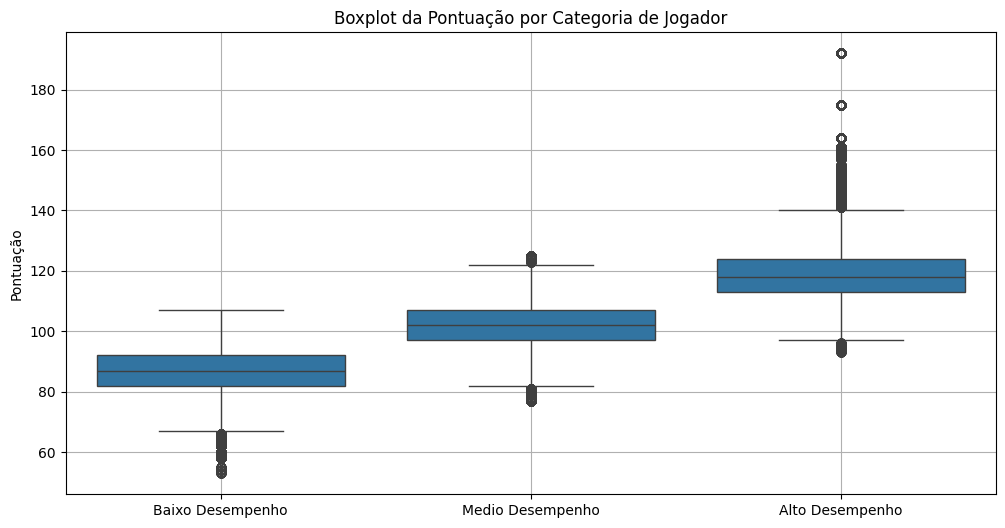

In [118]:
# Criar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='performance', y='points', data=amostra)

# Adicionar título e rótulos
plt.title('Boxplot da Pontuação por Categoria de Jogador')
plt.xlabel('')
plt.ylabel('Pontuação')
plt.grid(True)

# Exibir o gráfico
plt.show()

2. Distribuição de Idade dos Jogadores com histograma

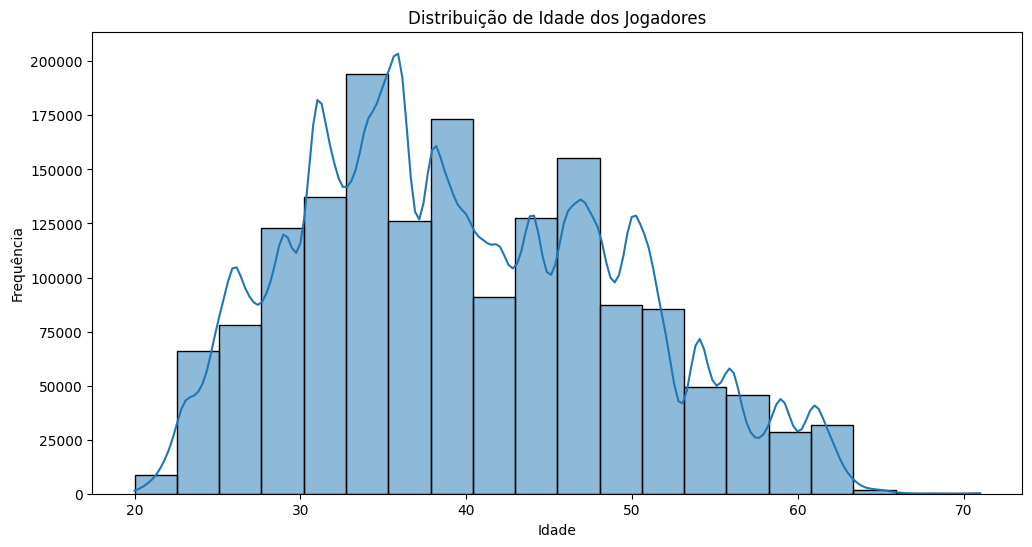

In [119]:
# Calcular a idade a partir da data de nascimento
amostra['age'] = (pd.to_datetime('today') - pd.to_datetime(amostra['birthdate'])).dt.days // 365

# Criar o histograma
plt.figure(figsize=(12, 6))
sns.histplot(amostra['age'], bins=20, kde=True)  # kde=True adiciona a densidade

# Adicionar título e rótulos
plt.title('Distribuição de Idade dos Jogadores')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()

3. Gráfico de Barras mostrando a Relação entre Pontuação e Rebotes por Time

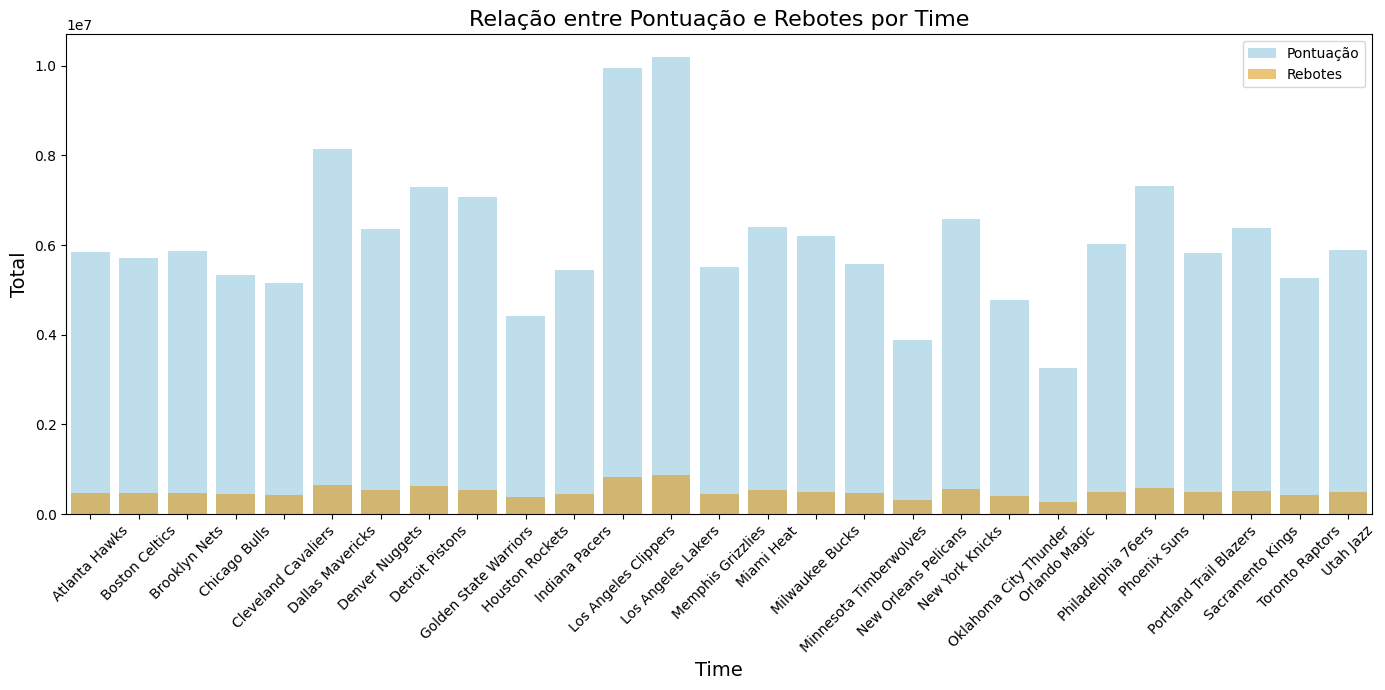

In [120]:
# Agrupar os dados por time e calcular a soma dos pontos e rebotes
team_stats = amostra.groupby('team_name').agg({'points': 'sum', 'rebounds': 'sum'}).reset_index()

# Definir o tamanho do gráfico
plt.figure(figsize=(14, 7))

# Criar o gráfico de barras
sns.barplot(x='team_name', y='points', data=team_stats, color='skyblue', label='Pontuação', alpha=0.6)
sns.barplot(x='team_name', y='rebounds', data=team_stats, color='orange', label='Rebotes', alpha=0.6)

# Adicionar título e rótulos
plt.title('Relação entre Pontuação e Rebotes por Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

# Exibir o gráfico
plt.tight_layout()  # Para ajustar o layout
plt.show()

## 7. Conclusão da Análise
Construa uma conclusão que resuma os achados na análise.

Na análise da base de dados da NBA revela algumas conclusões interessantes sobre o desempenho dos jogadores em relação a pontuação, assistências e rebotes:

1. **Probabilidade de Pontuação e Assistências Acima da Média**:
   - A probabilidade de um jogador marcar mais de 102 pontos em um jogo é de apenas 0,50%, enquanto a chance de ele realizar assistências acima da média é de 0,48%. Esses resultados indicam que pontuações muito altas e números elevados de assistências são relativamente raros, sugerindo que atingir níveis excepcionais em ambas as métricas é pouco comum.

2. **Desempenho Elevado**:
   - A probabilidade de um jogador ter um "Alto Desempenho" em um jogo é de 26,87%. Esse percentual é significativo, mostrando que um quarto dos jogadores presentes na nossa base de dados atinge alto desempenho.

3. **Testes de Hipóteses**:
   - **Hipótese 1**: A quantidade de rebotes não influencia a classificação de "Alto Desempenho" dos jogadores, conforme revelado pelo valor-p de 0,0, rejeitando a hipótese nula.
   - **Hipótese 2**: Jogadores das equipes de Los Angeles não têm uma probabilidade significativamente maior de alcançar "Alto Desempenho" em relação a outras equipes, pois o valor-p de 0,104 indica falta de significância estatística para esta associação.
   - **Hipótese 3**: Foi verificado que a média da pontuação não é maior em jogos com maior número de assistências, indicando que assistências não afetam diretamente a pontuação média dos jogadores.
   - **Hipótese 4**: Existe uma associação entre rebotes e assistências, com um coeficiente de correlação de 0,09 e um valor-p de 0,0, o que sugere que esses elementos podem ter uma leve relação positiva entre si.

4. **Visualizações**:
   - O boxplot da Pontuação por Categoria de Jogador mostra claramente a distribuição de pontos em cada categoria de desempenho. Observa-se que a categoria "Alto Desempenho" apresenta as maiores pontuações, com uma média aproximada de 115 pontos. Esse padrão indica que os jogadores classificados como "Alto Desempenho" tendem a contribuir significativamente para o jogo em termos de pontuação, destacando-se das demais categorias.

   - O gráfico de Distribuição de Idade dos Jogadores revela que a faixa etária predominante entre os jogadores na base de dados está entre 30 e 40 anos. Isso sugere que muitos atletas que compõem essa base de dados estão em uma fase madura de suas carreiras, possivelmente com bastante experiência acumulada, o que pode impactar o desempenho em comparação com jogadores mais jovens ou mais veteranos.
   
   - O gráfico de barras Relação entre Pontuação e Rebotes por Time destaca como diferentes equipes podem adotar estratégias distintas, evidenciando a importância dos rebotes na eficácia do desempenho coletivo. Observa-se uma tendência de que os times com maior quantidade de rebotes também alcançam pontuações mais altas. Isso sugere que equipes com forte presença nos rebotes têm mais oportunidades para realizar pontos, o que pode indicar um estilo de jogo focado na posse de bola e no controle do ritmo das partidas.


Assim, podemos concluir que a análise revela que atingir níveis excepcionais de pontuação e assistências na NBA é raro, mas aproximadamente um quarto dos jogadores consegue alcançar um "Alto Desempenho" nos jogos. Observa-se que a quantidade de rebotes e o fato de pertencer ao time de Los Angeles não influenciam significativamente essa classificação. Embora assistências não afetem diretamente a pontuação, há uma leve correlação positiva entre rebotes e assistências. Visualmente, jogadores de alto desempenho se destacam na pontuação, atletas em fase madura predominam na liga, e equipes com foco em rebotes tendem a atingir pontuações mais altas.

*Análises Futuras*: Fazer a separação dos jogadores por faixa de idade e analisar os dados com base na idade dos jogadores presentes na base.  
